Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression


## Assignment 🌯

You'll use a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/). How accurately can you predict whether a burrito is rated 'Great'?

> We have developed a 10-dimensional system for rating the burritos in San Diego. ... Generate models for what makes a burrito great and investigate correlations in its dimensions.

- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ ] Begin with baselines for classification.
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your model's validation accuracy. (Multiple times if you try multiple iterations.)
- [ ] Get your model's test accuracy. (One time, at the end.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

- [ ] Add your own stretch goal(s) !
- [ ] Make exploratory visualizations.
- [ ] Do one-hot encoding.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Get and plot your coefficients.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
# Load data downloaded from https://srcole.github.io/100burritos/
import pandas as pd
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

In [3]:
# Derive binary classification target:
# We define a 'Great' burrito as having an
# overall rating of 4 or higher, on a 5 point scale.
# Drop unrated burritos.
df = df.dropna(subset=['overall'])
df['Great'] = df['overall'] >= 4

In [4]:
# Clean/combine the Burrito categories
df['Burrito'] = df['Burrito'].str.lower()

california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

In [5]:
# Drop some high cardinality categoricals
df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

In [6]:
# Drop some columns to prevent "leakage"
df = df.drop(columns=['Rec', 'overall'])

In [7]:
df.head(20)

,Burrito,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
0,California,1/18/2016,3.5,4.2,NaN,6.49,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,California,1/24/2016,3.5,3.3,NaN,5.45,3.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Carnitas,1/24/2016,NaN,NaN,NaN,4.85,1.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Asada,1/24/2016,NaN,NaN,NaN,5.25,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,California,1/27/2016,4.0,3.8,x,6.59,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
5,Other,1/28/2016,NaN,NaN,NaN,6.99,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6,California,1/30/2016,3.0,2.9,NaN,7.19,1.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
7,Carnitas,1/30/2016,NaN,NaN,NaN,6.99,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8,California,2/1/2016,3.0,3.7,x,9.25,3.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
9,Asada,2/6/2016,4.0,4.1,NaN,6.25,3.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [8]:
# Replace conflicing values:
# x = 1 (yes)
# X = 1 (yes)
# No = 0 (no)
# Yes = 1 (yes)


df = df.fillna(0)
df = df.replace('x', 1).replace('X', 1).replace('No', 0).replace('Yes', 1)

In [9]:
df.dtypes

Burrito            object
Date               object
Yelp              float64
Google            float64
Chips               int64
Cost              float64
Hunger            float64
Mass (g)          float64
Density (g/mL)    float64
Length            float64
Circum            float64
Volume            float64
Tortilla          float64
Temp              float64
Meat              float64
Fillings          float64
Meat:filling      float64
Uniformity        float64
Salsa             float64
Synergy           float64
Wrap              float64
Unreliable          int64
NonSD               int64
Beef                int64
Pico                int64
Guac                int64
Cheese              int64
Fries               int64
Sour cream          int64
Pork                int64
Chicken             int64
Shrimp              int64
Fish                int64
Rice                int64
Beans               int64
Lettuce             int64
Tomato              int64
Bell peper          int64
Carrots     

In [10]:
df.Date = pd.to_datetime(df.Date)
df.Date

0     2016-01-18
1     2016-01-24
2     2016-01-24
3     2016-01-24
4     2016-01-27
         ...    
418   2019-08-27
419   2019-08-27
420   2019-08-27
421   2019-08-27
422   2019-08-27
Name: Date, Length: 421, dtype: datetime64[ns]

In [11]:
# Sort df by date and set date as index

df = df.sort_values(by='Date')
df = df.set_index('Date')

In [12]:
# Set train, val, and test split

train = df[:'2017-01-01']
val = df['2017-01-01':'2018-01-01']
test = df['2018-01-01':]

In [13]:
# define baseline

target = 'Great'
y_train = train[target]
y_train.value_counts(normalize = True)

False    0.590604
True     0.409396
Name: Great, dtype: float64

In [14]:
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.5906040268456376

In [16]:
y_val = val[target]
y_pred = [majority_class] * len(y_val)
accuracy_score(y_val, y_pred)

0.5529411764705883

In [17]:
# Set up linear regression

from sklearn.linear_model import LinearRegression

features = ['Yelp', 'Google', 'Hunger', 'Cost', 'Hunger', 'Length', 'Tortilla', 'Temp', 'Meat', 'Fillings', 'Meat:filling']
target = 'Great'

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [18]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

In [19]:
# encode model

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

C:\Users\benja\anaconda3\envs\unit2\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [20]:
# impute

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

In [21]:
pd.DataFrame(X_train_imputed, columns=X_train_encoded.columns)

,Yelp,Google,Hunger,Cost,Hunger,Length,Tortilla,Temp,Meat,Fillings,Meat:filling
0,0.0,0.0,4.0,8.00,4.0,0.0,3.0,0.0,2.0,3.0,2.0
1,0.0,0.0,4.0,0.00,4.0,0.0,5.0,0.0,5.0,5.0,5.0
2,3.5,4.2,3.0,6.49,3.0,0.0,3.0,5.0,3.0,3.5,4.0
3,0.0,0.0,2.0,5.25,2.0,0.0,3.0,2.0,3.5,3.0,4.0
4,3.5,3.3,3.5,5.45,3.5,0.0,2.0,3.5,2.5,2.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...
293,4.0,4.3,3.0,5.65,3.0,19.5,4.0,1.5,2.0,3.0,4.2
294,0.0,0.0,3.0,5.49,3.0,19.0,4.5,5.0,2.0,2.0,2.5
295,3.5,3.7,4.0,7.75,4.0,20.0,3.5,2.5,3.0,3.3,1.4
296,0.0,0.0,4.0,7.75,4.0,19.5,4.0,4.5,2.0,2.0,3.5


In [22]:
# scaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

In [23]:
model = LogisticRegressionCV()
model.fit(X_train_scaled, y_train)

LogisticRegressionCV()

In [24]:
# accuracy score

y_pred = model.predict(X_val_scaled)
print('Accuracy Score:', accuracy_score(y_val, y_pred))

Accuracy Score: 0.8


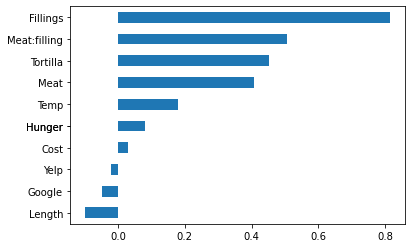

In [25]:
# plot coef

%matplotlib inline
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients.sort_values().plot.barh();

In [26]:
# test

X_test = test[features]
X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)
y_pred = model.predict(X_test_scaled)

In [27]:
test_result = test[['Burrito']].copy()
test_result['Great'] = y_pred

In [28]:
# print test result

test_result

,Burrito,Great
Date,,
2018-01-02,California,True
2018-01-09,Other,False
2018-01-12,Other,False
2018-01-12,California,True
2018-04-04,Asada,False
2018-04-09,Carnitas,False
2018-04-09,Carnitas,True
2018-04-09,Carnitas,True
2018-04-14,California,True
